In [3]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yandex-translate

  Using cached yandex.translate-0.3.5.tar.gz (2.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for yandex-translate: filename=yandex.translate-0.3.5-py3-none-any.whl size=3992 sha256=35003b44d26524b10f75712f0562edd5059b70f2ae906f4146b2d73fbe205810
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\1a\74\ae\5a18e6222c8cfde51f0b3bc878538944241e601b88ad6e902f
Successfully built yandex-translate
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from yandex_translate import YandexTranslate
from yandex_translate import YandexTranslateException

In [6]:
PLOT_LABEL_FONT_SIZE = 14 
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

In [7]:
def translate(string, translator_obj=None):
    if translator_class == None:
        return string
    t = translator_class.translate(string, 'en-ru')
    return t['text'][0]

In [9]:
YANDEX_API_KEY = 'Начиная с 27 мая 2020 года выдача бесплатных ключей приостановлена'
try:
    translate_obj = YandexTranslate(YANDEX_API_KEY)
except YandexTranslateException:
    translate_obj = None

In [10]:
def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)

In [11]:
df = pd.read_csv('./scrubbed.csv', escapechar='`', low_memory=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16892\2375682037.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  country_count = pd.value_counts(df['country'].values, sort=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16892\3392539013.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


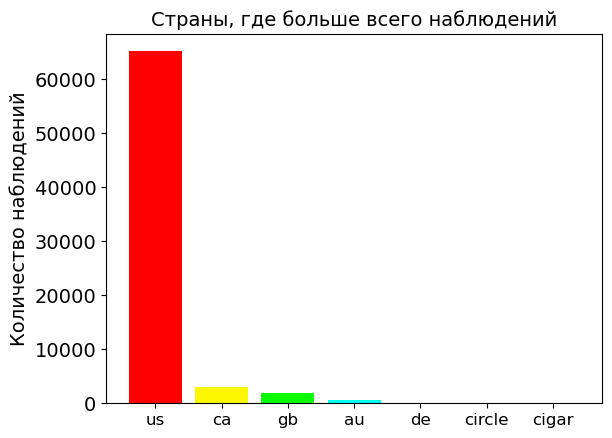

In [17]:
country_count = pd.value_counts(df['country'].values, sort=True)
country_count_keys, country_count_values = dict_sort(dict(country_count))    
TOP_COUNTRY = len(country_count_keys)
plt.title('Страны, где больше всего наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(TOP_COUNTRY), country_count_values, color=getColors(TOP_COUNTRY))
plt.xticks(np.arange(TOP_COUNTRY), country_count_keys, rotation=0, fontsize=12)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Количество наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16892\3392539013.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


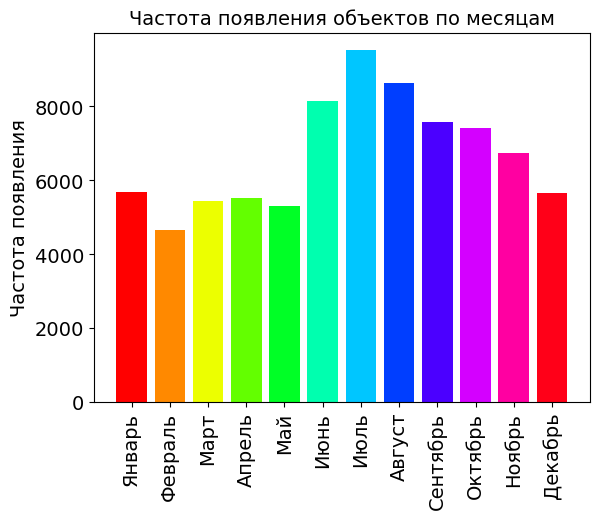

In [18]:
MONTH_COUNT = [0,0,0,0,0,0,0,0,0,0,0,0]
MONTH_LABEL = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь' ,'Октябрь' ,'Ноябрь' ,'Декабрь']

for i in df['datetime']:
    m,d,y_t =  i.split('/')
    MONTH_COUNT[int(m)-1] = MONTH_COUNT[int(m)-1] + 1

plt.bar(np.arange(12), MONTH_COUNT, color=getColors(12))
plt.xticks(np.arange(12), MONTH_LABEL, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Частота появления', fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.title('Частота появления объектов по месяцам', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16892\910755072.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  shapes_type_count = pd.value_counts(df['shape'].values)


NameError: name 'shapes_type_count_values' is not defined

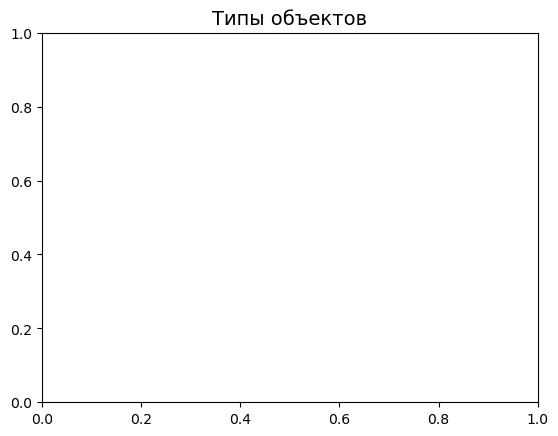

In [22]:
shapes_type_count = pd.value_counts(df['shape'].values)
shapes_type_count_keys, shapes_count_values = dict_sort(dict(shapes_type_count))
OBJECT_COUNT = len(shapes_type_count_keys)
plt.title('Типы объектов', fontsize=PLOT_LABEL_FONT_SIZE)
bar = plt.bar(np.arange(OBJECT_COUNT), shapes_type_count_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_type_count_keys, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Сколько раз видели', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

In [23]:
# не смог разобраться что не так.